In [1]:
from sklearn.datasets import fetch_olivetti_faces

# Load the Olivetti Faces dataset
data = fetch_olivetti_faces(shuffle=True, random_state=42)
X = data.data  # Features (images)
y = data.target  # Target labels (person IDs)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/gurman/scikit_learn_data


In [2]:
from sklearn.model_selection import train_test_split

# Split the data into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC  

# Initialize your classifier
classifier = SVC(kernel='linear')  

# Perform k-fold cross-validation (e.g., k=5)
scores = cross_val_score(classifier, X_train, y_train, cv=5)

/Users/gurman/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/gurman/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/gurman/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/gurman/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/gurman/an

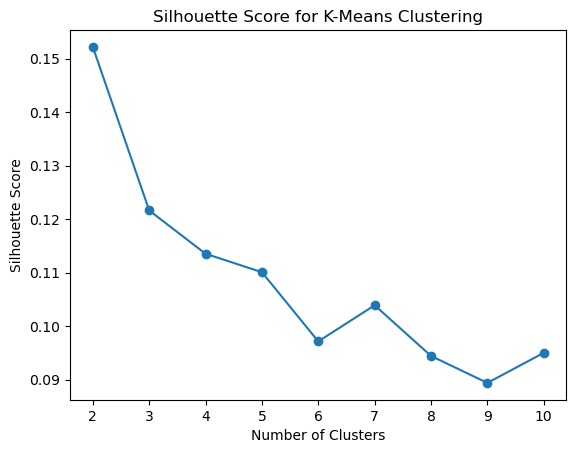

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Determine the optimal number of clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_train)
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores to choose the optimal number of clusters
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for K-Means Clustering")
plt.show()

optimal_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2 

In [16]:
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a K-Means model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
X_train_reduced = kmeans.fit_transform(X_train)

# Initialize classifier
classifier = SVC(kernel='linear') 

# Create a pipeline for K-Means and classifier
pipeline = Pipeline([
    ('kmeans', kmeans),
    ('classifier', classifier),
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate the classifier on the validation set
validation_accuracy = pipeline.score(X_val, y_val)

# Make predictions on the validation set
y_val_pred = pipeline.predict(X_val)

# Calculate and display accuracy
print("Validation Accuracy:", validation_accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_val, y_val_pred))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

/Users/gurman/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/gurman/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Validation Accuracy: 0.275
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.25      0.50      0.33         2
           2       0.50      0.50      0.50         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       1.00      0.50      0.67         2
           6       0.50      0.50      0.50         2
           7       0.50      1.00      0.67         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          10       1.00      0.50      0.67         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       0.40      1.00      0.57         2
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         2
          16       0.00      0.

/Users/gurman/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gurman/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gurman/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cluster Labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Cosine Similarity Matrix:
[[1.         0.16197532 0.10200131 ... 0.         0.         0.        ]
 [0.16197532 1.         0.         ... 0.3039394  0.12528563 0.        ]
 [0.10200131 0.         1.         ... 0.         0.1513257  0.16240191]
 ...
 [0.         0.3039394  0.         ... 1.         0.09027433 0.09434128]
 [0.         0.12528563 0.1513257  ... 0.09027433 1.         0.23955828]
 [0.         0.         0.16240191 ... 0.09434128 0.23955828 1.        ]]
Cosine Distance Matrix:
[[

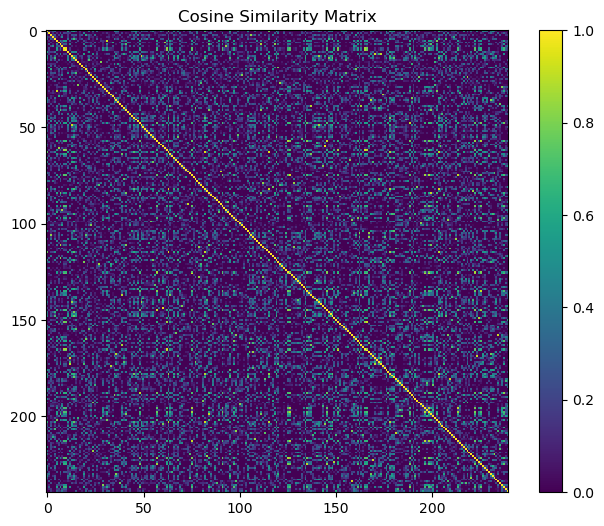

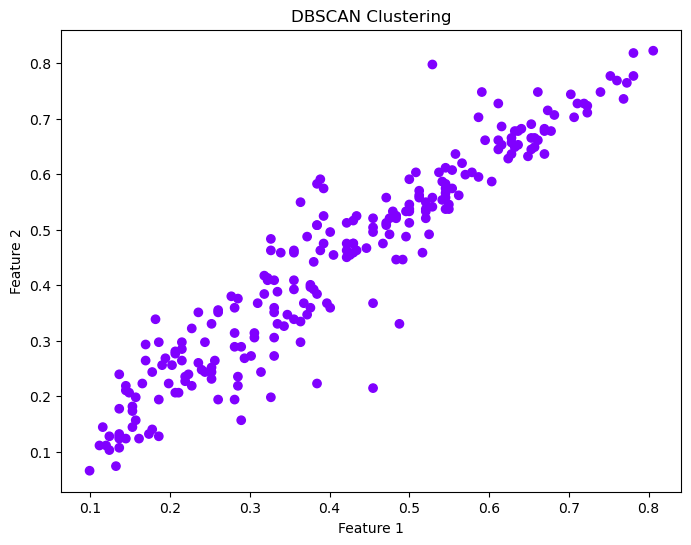

In [13]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Standardize the feature vectors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Calculate pairwise cosine distance matrix
cosine_dist_matrix = cosine_distances(X_train_scaled)

# Convert distance to similarity (similarity = 1 - distance)
cosine_sim_matrix = 1 - cosine_dist_matrix

# Ensure the similarity matrix contains non-negative values by clipping values to be in [0, 1]
cosine_sim_matrix = np.clip(cosine_sim_matrix, 0, 1)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='precomputed') 
cluster_labels = dbscan.fit_predict(cosine_sim_matrix)

# Output the cluster labels
print("Cluster Labels:")
print(cluster_labels)

# Output the cosine similarity matrix
print("Cosine Similarity Matrix:")
print(cosine_sim_matrix)

# Output the cosine distance matrix (optional)
print("Cosine Distance Matrix:")
print(cosine_dist_matrix)

# Visualize the similarity matrix (optional)
plt.figure(figsize=(8, 6))
plt.imshow(cosine_sim_matrix, cmap='viridis', interpolation='nearest')
plt.title("Cosine Similarity Matrix")
plt.colorbar()
plt.show()

# Visualize the cluster labels (optional)
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=cluster_labels, cmap='rainbow')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()